Datos de entrada (shape): (8, 2)
Ejemplo de entrada: [5. 2.]
----------------------------------

🔹 Iniciando entrenamiento del modelo con 2 nodos de entrada...



C:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Modelo entrenado exitosamente!

=== PREDICCIONES ===

Cigarros:  0, Años:  0 → Riesgo: 9.83
Cigarros: 10, Años:  5 → Riesgo: 33.21
Cigarros: 20, Años: 10 → Riesgo: 56.59
Cigarros: 35, Años: 20 → Riesgo: 92.94

=== PARÁMETROS DEL MODELO ===

Peso para 'Cigarros' (w1): 2.0844
Peso para 'Años' (w2):    0.5078
Sesgo (intersección, b):  9.8253


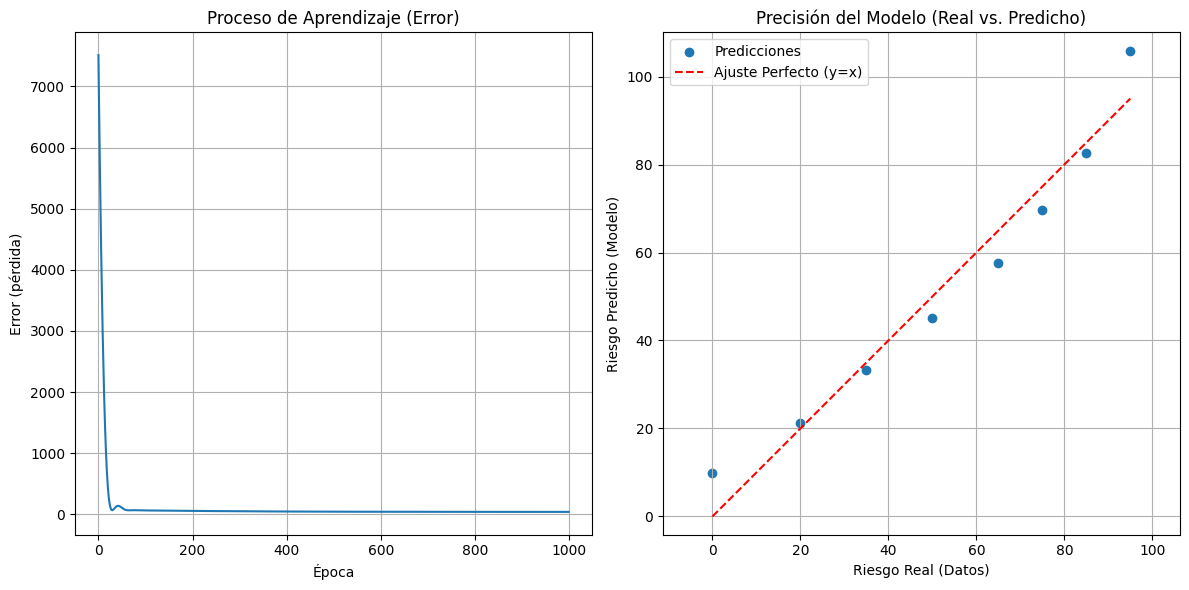

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# === 1. Datos de entrada y salida ===
# Ahora tenemos DOS nodos de entrada (features)
# Entrada 1: Número de cigarros que una persona fuma por día
cantidad_cigarros_dia = np.array([0, 5, 10, 15, 20, 25, 30, 40], dtype=float)
# Entrada 2: Cuántos años ha fumado la persona (NUESTRO SEGUNDO NODO)
anios_fumando = np.array([0, 2, 5, 8, 12, 15, 20, 25], dtype=float)

# Combinamos ambas entradas en una sola matriz.
# Cada fila es un "paciente" con [cigarros_dia, anios_fumando]
entradas_del_modelo = np.array(list(zip(cantidad_cigarros_dia, anios_fumando)))

# Salida: Nivel de riesgo de salud estimado (sigue siendo el mismo)
nivel_riesgo_salud = np.array([0, 20, 35, 50, 65, 75, 85, 95], dtype=float)

print("Datos de entrada (shape):", entradas_del_modelo.shape)
print("Ejemplo de entrada:", entradas_del_modelo[1]) # [5., 2.]
print("----------------------------------\n")

# === 2. Creación del modelo ===
# Sigue siendo UNA SOLA neurona (units=1).
# El cambio clave es: input_shape=[2], porque ahora recibe 2 nodos de entrada.
capa_salida = tf.keras.layers.Dense(units=1, input_shape=[2])
modelo_lineal = tf.keras.Sequential([capa_salida])

# === 3. Configuración del aprendizaje ===
# Usamos un optimizador y una función de pérdida
modelo_lineal.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

print("🔹 Iniciando entrenamiento del modelo con 2 nodos de entrada...\n")

# === 4. Entrenamiento del modelo ===
# Entrenamos el modelo con las entradas combinadas
historial_entrenamiento = modelo_lineal.fit(
    entradas_del_modelo, 
    nivel_riesgo_salud, 
    epochs=1000, 
    verbose=False
)

print("✅ Modelo entrenado exitosamente!\n")

# === 5. Visualización del proceso de aprendizaje ===
# Esto no cambia, seguimos viendo cómo disminuye el error
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Proceso de Aprendizaje (Error)")
plt.xlabel("Época")
plt.ylabel("Error (pérdida)")
plt.plot(historial_entrenamiento.history["loss"])
plt.grid(True)

# === 6. Predicciones con nuevos valores ===
print("=== PREDICCIONES ===\n")

# Ahora debemos proveer 2 valores para cada predicción: [cigarros, años]
valores_prueba = np.array([
    [0, 0],    # 0 cigarros, 0 años
    [10, 5],   # 10 cigarros, 5 años
    [20, 10],  # 20 cigarros, 10 años
    [35, 20]   # 35 cigarros, 20 años
])

predicciones = modelo_lineal.predict(valores_prueba, verbose=0)

for i, prueba in enumerate(valores_prueba):
    print(f"Cigarros: {prueba[0]:2}, Años: {prueba[1]:2} → Riesgo: {predicciones[i][0]:.2f}")

# === 7. Mostrar los parámetros aprendidos ===
print("\n=== PARÁMETROS DEL MODELO ===\n")
pesos_y_sesgo = capa_salida.get_weights()
pesos = pesos_y_sesgo[0]
sesgo = pesos_y_sesgo[1]

# Ahora tenemos DOS pesos (w1, w2), uno para cada nodo de entrada
print(f"Peso para 'Cigarros' (w1): {pesos[0][0]:.4f}")
print(f"Peso para 'Años' (w2):    {pesos[1][0]:.4f}")
print(f"Sesgo (intersección, b):  {sesgo[0]:.4f}")

# === 8. Visualización de la precisión del modelo ===
# Ya no podemos graficar una línea 2D (porque los datos son 3D: x1, x2, y)
# En su lugar, graficamos "Valor Real" vs. "Valor Predicho"
# Si el modelo es bueno, los puntos deben estar cerca de la línea y=x

plt.subplot(1, 2, 2)
plt.title("Precisión del Modelo (Real vs. Predicho)")
plt.xlabel("Riesgo Real (Datos)")
plt.ylabel("Riesgo Predicho (Modelo)")

# Obtenemos las predicciones para los datos de entrenamiento
predicciones_entrenamiento = modelo_lineal.predict(entradas_del_modelo, verbose=0)

# Graficamos los puntos reales vs. los predichos
plt.scatter(nivel_riesgo_salud, predicciones_entrenamiento, label="Predicciones")

# Graficamos la línea ideal (y=x) donde Real = Predicho
ideal_line = np.linspace(min(nivel_riesgo_salud), max(nivel_riesgo_salud), 10)
plt.plot(ideal_line, ideal_line, 'r--', label="Ajuste Perfecto (y=x)")

plt.legend()
plt.grid(True)
plt.axis('equal') # Asegura que los ejes tengan la misma escala

plt.tight_layout()
plt.show()